### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### Вариант № 19

In [2]:
from urllib.request import urlopen
from contextlib import closing
import numpy as np
import pandas as pd

## 1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.

In [3]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"

# считываем данные в объект DataFrame
my_data = pd.read_csv( url,sep="\s+" ,header=None, prefix="V" )

print( "\n*** Начало данных:\n", my_data.head() ) # начальные данные
print( "\n*** Конец данных:\n",  my_data.tail() ) # конечные данные

summary = my_data.describe()                      # сводка данных 
print( "\n*** Сводка данных:\n", summary)


*** Начало данных:
            V0    V1    V2    V3   V4    V5    V6    V7  V8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp

*** Конец данных:
              V0    V1    V2    V3   V4    V5    V6    V7  V8
331  TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30  pp
332  UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32  pp
333  USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38  pp
334  XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37  pp
335  YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52  pp

*** Сводка данных:
                V1          V2          V3          V4          V5          V6  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488   

## 2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями

In [4]:
my_data = my_data.replace('?',np.NaN) # заменить '?' на np.NaN

print('Число записей = %d' % (my_data.shape[0]))
print('Число признаков = %d' % (my_data.shape[1]))

print('Число отсутствующих значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число записей = 336
Число признаков = 9
Число отсутствующих значений:
	V0: 0
	V1: 0
	V2: 0
	V3: 0
	V4: 0
	V5: 0
	V6: 0
	V7: 0
	V8: 0


In [5]:
my_data.dtypes

V0     object
V1    float64
V2    float64
V3    float64
V4    float64
V5    float64
V6    float64
V7    float64
V8     object
dtype: object

In [6]:
print('Число записей в исходных данных = %d' % (my_data.shape[0]))

data2 = my_data.dropna()
print('Число записей после удаления отсутствующих значений = %d' % (data2.shape[0]))

Число записей в исходных данных = 336
Число записей после удаления отсутствующих значений = 336


## 3. Определите признак, содержащий метку класса. Если признак, содержащий метку класса, принимает более 10 различных значений, то выполните дискретизацию этого признака, перейдя к 3-4 диапазонам значений.

imL      2
om      20
cp     143
im      77
omL      5
pp      52
imS      2
imU     35
Name: V8, dtype: int64

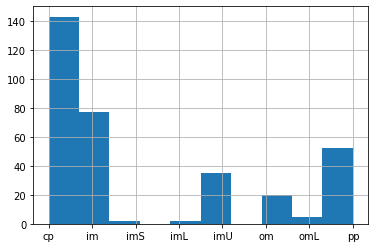

In [7]:
my_data['V8'].hist(bins=10)
my_data['V8'].value_counts(sort=False)

### 4. Определите числовой признак, имеющий максимальную дисперсию. Исследуйте, принимает ли это признак дискретные или непрерывные значения.

In [8]:
des=my_data.var()
des


V1    0.037882
V2    0.021950
V3    0.007831
V4    0.000744
V5    0.014976
V6    0.046549
V7    0.043853
dtype: float64

In [15]:
max(des)

0.046548624733475465

Это признак v6

In [9]:
my_data["V6"]

0      0.24
1      0.35
2      0.37
3      0.45
4      0.25
       ... 
331    0.68
332    0.35
333    0.39
334    0.42
335    0.53
Name: V6, Length: 336, dtype: float64

Признак V6 принимает непрерывные значения

### 5. При помощи класса SelectKBest библиотеки scikit-learn найдите два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.

In [10]:
from sklearn.feature_selection import SelectKBest,f_regression


In [22]:
array = my_data.select_dtypes(include=['float64', 'int64']).values
X = array[:,[0,1,2,3,4,6]] # входные переменные
Y = array[:,5]   # выходная переменная 

# отбор признаков
test = SelectKBest(score_func=f_regression , k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
df_new = my_data[['V1','V2','V3','V4', 'V6','V7']].iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Оценки признаков:
 [6.24824802e+01 1.03651910e+01 3.09291661e+00 1.95664516e-02
 2.82993726e+01 6.34129167e+02]

Отобранные признаки:
      V1    V7
0  0.49  0.35
1  0.07  0.44
2  0.56  0.46
3  0.59  0.36
4  0.23  0.35


V1 и V7 имеют наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.

### 6.Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

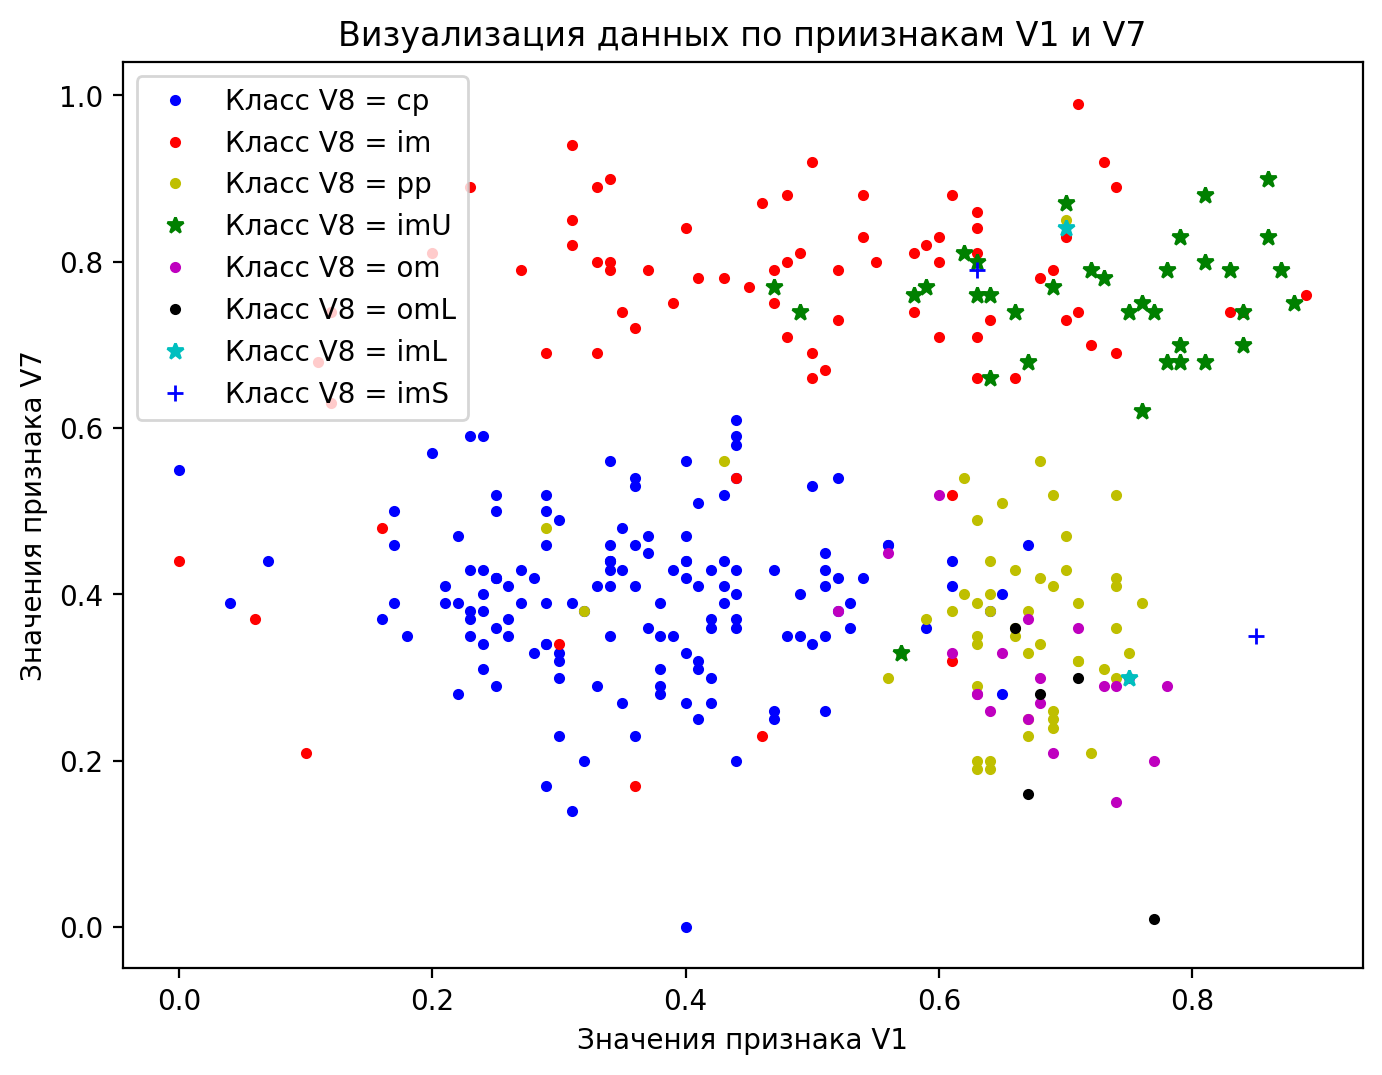

In [72]:
from urllib.request import urlopen
from contextlib import closing
import matplotlib.pyplot as plt
X=my_data['V1']
Y=my_data['V7']
target=my_data['V8']


plt.figure( figsize=(8, 6), dpi=200 )

plt.plot(X[target=='cp'],Y[target=='cp'],"b.", label='Класс V8 = cp') 
plt.plot(X[target=='im'],Y[target=='im'],"r.", label='Класс V8 = im') 
plt.plot(X[target=='pp'],Y[target=='pp'],"y.", label='Класс V8 = pp')
plt.plot(X[target=='imU'],Y[target=='imU'],"g*", label='Класс V8 = imU') 
plt.plot(X[target=='om'],Y[target=='om'],"m.", label='Класс V8 = om') 
plt.plot(X[target=='omL'],Y[target=='omL'],"k.", label='Класс V8 = omL')
plt.plot(X[target=='imL'],Y[target=='imL'],"c*", label='Класс V8 = imL') 
plt.plot(X[target=='imS'],Y[target=='imS'],"b+", label='Класс V8 = imS') 
plt.xlabel('Значения признака V1') 
plt.ylabel('Значения признака V7')
plt.title('Визуализация данных по приизнакам V1 и V7')
plt.legend();

### 7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 99%.

In [33]:
from sklearn.decomposition import PCA 
mynew_data = my_data.select_dtypes(include=['float64', 'int64'])
for r in range(1,8):
    pca = PCA( n_components = r )
    pca.fit( mynew_data )
    if sum(pca.explained_variance_ratio_)*100 >99 :
        print( "r =",r,"\tДисперсия =", sum(pca.explained_variance_ratio_)*100,"%" )

r = 6 	Дисперсия = 99.62084195873778 %
r = 7 	Дисперсия = 100.0 %


### 8. Пользуясь методом главных компонент, снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

*** Первые 5 строк данных:
[-0.28560071 -0.03527368]
[-0.29083817 -0.330159  ]
[-0.10467597  0.0152477 ]
[-0.08794301  0.12221767]
[-0.3662676  -0.21036611]
*** Дисперсии компонент:
 [0.5161681 0.2442034]


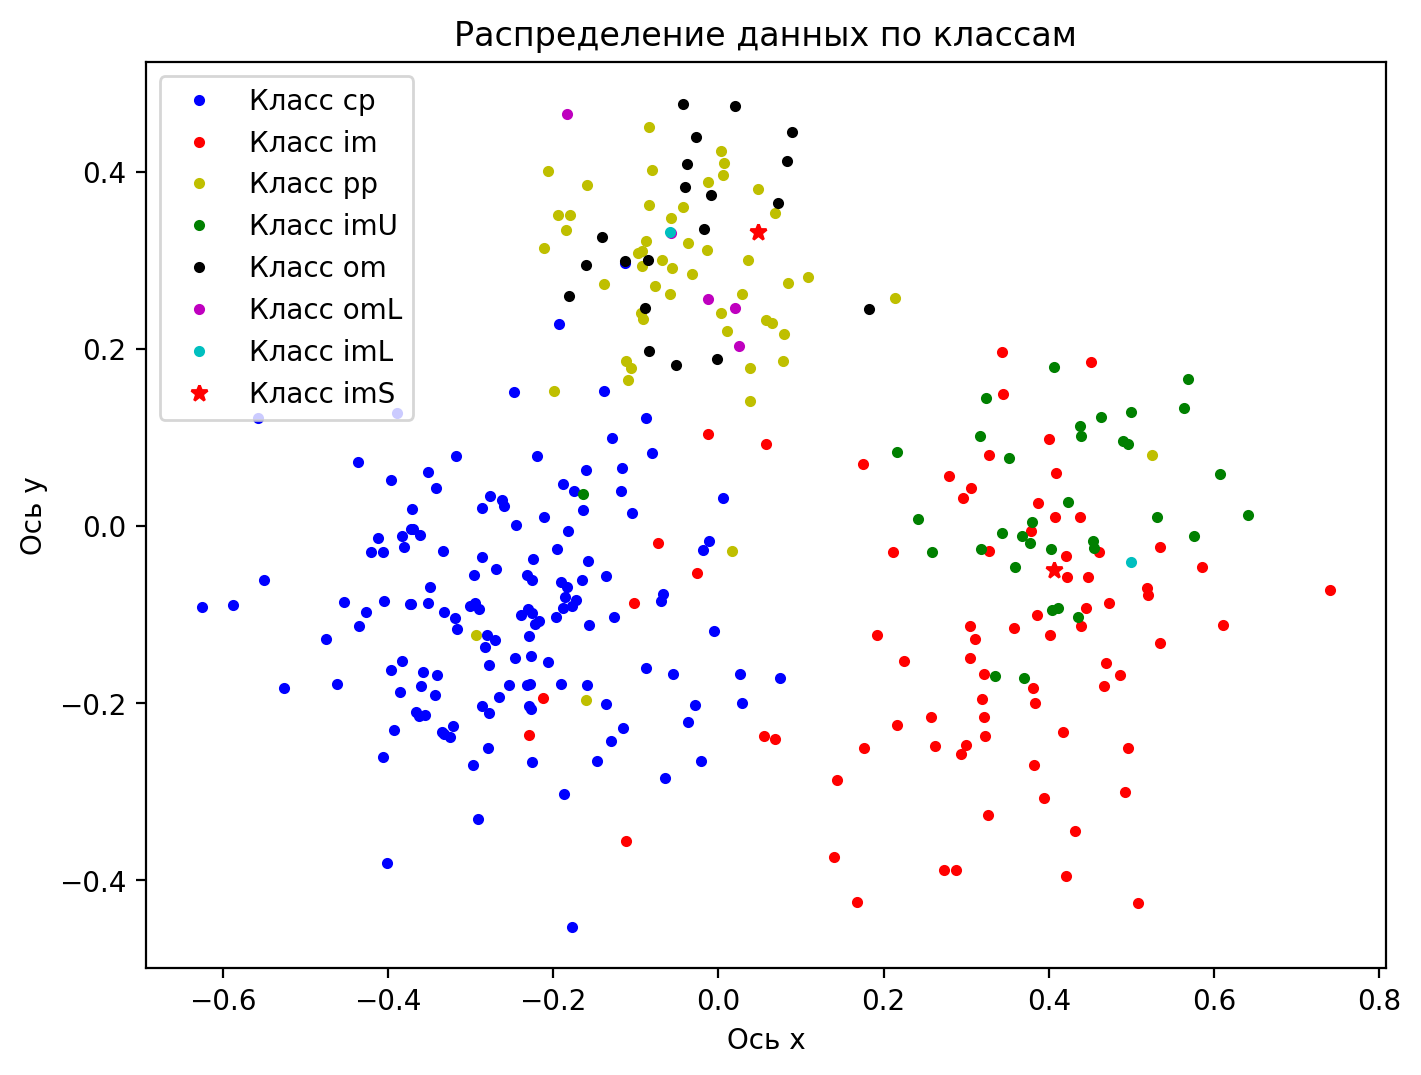

In [94]:
#data = mynew_data[:, 0:8]
#target = mynew_data[:,8]

# главные компоненты
pca = PCA(n_components=2)

pcad = pca.fit_transform(mynew_data) # numpy array

print( "*** Первые 5 строк данных:" )
for x in range(0,5):
  print( pcad[x] )  

print( "*** Дисперсии компонент:\n", pca.explained_variance_ratio_)

plt.figure( figsize=(8, 6), dpi=200 )

plt.plot(pcad[target=='cp',0],pcad[target=='cp',1],"b.", label='Класс cp') 
plt.plot(pcad[target=='im',0],pcad[target=='im',1],"r.", label='Класс im') 
plt.plot(pcad[target=='pp',0],pcad[target=='pp',1],"y.", label='Класс pp')
plt.plot(pcad[target=='imU',0],pcad[target=='imU',1],"g.", label='Класс imU') 
plt.plot(pcad[target=='om',0],pcad[target=='om',1],"k.", label='Класс om') 
plt.plot(pcad[target=='omL',0],pcad[target=='omL',1],"m.", label='Класс omL')
plt.plot(pcad[target=='imL',0],pcad[target=='imL',1],"c.", label='Класс imL') 
plt.plot(pcad[target=='imS',0],pcad[target=='imS',1],"r*", label='Класс imS') 

plt.xlabel('Ось х') 
plt.ylabel('Ось у')
plt.title('Распределение данных по классам')
plt.legend();